# eBay Kleinanzeigen – Exploring Used Car Sales Data

## 1. Introduction

In this project, we'll work with a dataset of used cars from **eBay Kleinanzeigen**, a [classifieds](https://en.wikipedia.org/wiki/Classified_advertising) section of the German eBay website. The dataset was originally scraped and uploaded to [Kaggle](https://www.kaggle.com/). Since the original dataset isn't available on Kaggle anymore, we can find it [here](https://data.world/data-society/used-cars-data) instead.

[Dataquest](https://www.dataquest.io/) has made a few modifications from the original dataset:
- They sampled `50,000` data points from the full dataset, to ensure code runs quickly in our hosted environment.
- They dirtied the dataset a bit to more closely resemble what we would expect from a scraped dataset. Note the version uploaded to Kaggle was cleaned to be easier to work with.

The data dictionary provided with data is as follows:

- `dateCrawled` – the date of ad crawling.
- `name` – the name of the vehicle.
- `seller` – whether the seller is private or a dealer.
- `offerType` – the type of the listing.
- `price` – the price of the vehicle.
- `abtest` – whether the listing is included in an A/B test.
- `vehicleType` – the vehicle type.
- `yearOfRegistration` – the vehicle's registration year.
- `gearbox` – the transmission type.
- `powerPS` – the vehicle power in PS.
- `model` – the vehicle's model name.
- `odometer` – the kilometers the vehicle traveled.
- `monthOfRegistration` – the vehicle's registration month.
- `fuelType` – the vehicle's fuel type.
- `brand` – the brand of the vehicle.
- `notRepairedDamage` – whether the car has unrepaired damage.
- `dateCreated` – the listing's creation date.
- `nrOfPictures` – the number of pictures in the ad.
- `postalCode` – the vehicle's location postal code.
- `lastSeenOnline` – the date when the crawler last saw the ad.

## 2. Opening and Exploring the Data

The aim of this project is to clean the data and analyze the included used car listings. So let's start by importing the libraries we need, and reading the dataset into pandas.

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the display format for float values
pd.options.display.float_format = '{:.4f}'.format

# Read the dataset into a pandas DataFrame, and display the first few rows
autos = pd.read_csv('Datasets/autos.csv', encoding='Latin-1')
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [2]:
# Display concise summary information
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

From the output above, we observe that:

* The dataset contains `20` columns, most of which are strings.
* There are a few columns with null values, but no columns have more than `~20%` null values.
* The column names use [camelcase](https://en.wikipedia.org/wiki/Camel_case) instead of Python's preferred [snakecase](https://en.wikipedia.org/wiki/Snake_case), which means we can't just replace spaces with underscores.

## 3. Cleaning Column Names

Let's convert the column names from **camelcase** to **snakecase**, and reword some of the column names to be more descriptive.

In [3]:
# Display the column names before renaming
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [4]:
# Rename columns to 'snake_case' for easier access and readability
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
                 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
                 'odometer', 'registration_month', 'fuel_type', 'brand',
                 'unrepaired_damage', 'date_created', 'pictures_number', 'postal_code',
                 'last_seen']

# Display the column names after renaming
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'pictures_number', 'postal_code',
       'last_seen'],
      dtype='object')

## 4. Further Exploration and Cleaning

### 4.1. Part One

Now, let's perform some basic data exploration before determining what other cleaning tasks we need to do.

In [5]:
# Generate descriptive statistics for all columns
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,date_created,pictures_number,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.0000,47320,50000.0000,47242,50000,50000.0000,45518,50000,40171,50000,50000.0000,50000.0000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.0733,NaN,116.3559,NaN,NaN,5.7234,NaN,NaN,NaN,NaN,0.0000,50813.6273,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.7128,NaN,209.2166,NaN,NaN,3.7120,NaN,NaN,NaN,NaN,0.0000,25779.7480,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0000,NaN,0.0000,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,0.0000,1067.0000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0000,NaN,70.0000,NaN,NaN,3.0000,NaN,NaN,NaN,NaN,0.0000,30451.0000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.0000,NaN,105.0000,NaN,NaN,6.0000,NaN,NaN,NaN,NaN,0.0000,49577.0000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.0000,NaN,150.0000,NaN,NaN,9.0000,NaN,NaN,NaN,NaN,0.0000,71540.0000,NaN


From the descriptive statistics table, there are a number of things worth noting:

- The `seller` and `offer_type` columns mostly contain the same values, thus we can safely remove them from the DataFrame.
- The `price` and `odometer` columns contain numeric values stored as text, which can be cleaned and converted.
- We should consider removing some rows based on the `registration_year` column. The table contains a minimum and maximum value of `1000` and `9999`, respectively. This is highly impropable for vehicle registrations.
- The minimum value in the `registration_month` column is `0`, which is impossible.
- The maximum value in the `power_ps` column is significantly higher than the value at the `75th` percentile, which suggests some inaccurate data in this column.
- We can drop the `pictures_number` column as none of the rows have any pictures.

### 4.2. Part Two

Because the `price` and `odometer` columns contain numeric values stored as text, we'll create two functions – one for each column, to remove any non-numeric characters, and convert the columns to a numeric data type.

In [6]:
# Select the 'price' and 'odometer' columns, then display the first 5 rows
price_and_odometer = autos[['price', 'odometer']]
price_and_odometer.head()

,price,odometer
0,"$5,000","150,000km"
1,"$8,500","150,000km"
2,"$8,990","70,000km"
3,"$4,350","70,000km"
4,"$1,350","150,000km"


In [7]:
def convert_price(string):
    # Check if the value is null
    if pd.isnull(string):
        return None
    else:
        # Remove non-numeric characters and convert to integer
        string = string.replace('$','')
        string = string.replace(',','')
        return int(string)

# Apply the conversion function to the 'price' column
autos['price'] = autos['price'].apply(convert_price)
autos['price'].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int64

In [8]:
def convert_odometer(string):
    # Check if the value is null
    if pd.isnull(string):
        return None
    else:
        # Remove non-numeric characters and 'km', then convert to integer
        string = string.split(' ')[0]
        string = string.replace(',','')
        string = string.replace('km','')
        return int(string)

# Apply the conversion function to the 'odometer' column
autos['odometer'] = autos['odometer'].apply(convert_odometer)
autos['odometer'].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer, dtype: int64

### 4.3. Part Three

Let's rename `odometer` to `odometer_km` to be more descriptive, and also drop the columns that won't be required for our analysis.

In [9]:
# Rename the 'odometer' column, and drop the unnecessary columns
autos = autos.rename({'odometer': 'odometer_km'}, axis=1)
autos = autos.drop(["pictures_number", "seller", "offer_type"], axis='columns')

# Display the column names after renaming and dropping columns
autos.columns

Index(['date_crawled', 'name', 'price', 'ab_test', 'vehicle_type',
       'registration_year', 'gearbox', 'power_ps', 'model', 'odometer_km',
       'registration_month', 'fuel_type', 'brand', 'unrepaired_damage',
       'date_created', 'postal_code', 'last_seen'],
      dtype='object')

## 5. Exploring the Odometer and Price Columns

Let's continue exploring the data, specifically looking for suspicious data. We'll start by analyzing the `odometer_km` and `price` columns using their minimum and maximum values, then remove any outliers that look unrealistically high or low.

In [10]:
# Display the number of unique values, the descriptive statistics,
# and the frequency of the top 5 most common values for the 'odometer_km' column
print(autos['odometer_km'].nunique(), end='\n\n')
print(autos['odometer_km'].describe(), end='\n\n')
print(autos['odometer_km'].value_counts().head())

13

count    50000.0000
mean    125732.7000
std      40042.2117
min       5000.0000
25%     125000.0000
50%     150000.0000
75%     150000.0000
max     150000.0000
Name: odometer_km, dtype: float64

odometer_km
150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
Name: count, dtype: int64


There are `13` unique values in the `odometer_km` column. We also notice that most cars in this dataset have higher odometer readings. Additionally, there don't appear to be any unrealistically high or low outliers in this column.

In [11]:
# Display the number of unique values, the descriptive statistics,
# and the frequency of the top 5 most common values for the 'price' column
print(autos['price'].nunique(), end='\n\n')
print(autos['price'].describe(), end='\n\n')
print(autos['price'].value_counts().head())

2357

count      50000.0000
mean        9840.0438
std       481104.3805
min            0.0000
25%         1100.0000
50%         2950.0000
75%         7200.0000
max     99999999.0000
Name: price, dtype: float64

price
0       1421
500      781
1500     734
2500     643
1000     639
Name: count, dtype: int64


We can see that there are `1421` rows of cars with a price of `0` dollars, which appears improbable. Also, the maximum price for a car is a whopping `$99,999,999`! We will need to further examine the highest and lowest prices of this column.

In [12]:
# Display the frequency of the top 15 lowest prices in ascending order
autos['price'].value_counts().sort_index().head(15)

price
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
Name: count, dtype: int64

When examining the low end of the price spectrum, we notice there are a number of prices below `18` dollars. It would be safe to keep the lowest prices in our DataFrame as eBay is an auction site, and there can be starting bids of `$1`.

In [13]:
# Display the frequency of the top 15 highest prices in descending order
autos['price'].value_counts().sort_index(ascending=False).head(15)

price
99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
Name: count, dtype: int64

When examining the high end of the price spectrum, we notice a sudden spike from `350,000` to `999,990` dollars, which differs significantly from the gradual increase in prices observed before. Given this anomaly, it's safe to exclude any data points exceeding `$350,000`.

In [14]:
# Filter the 'autos' dataset to include only rows where the price falls between $1 and $350,000
autos = autos[autos['price'].between(1, 350000)]

# Display descriptive statistics for the 'price' column after filtering
autos['price'].describe()

count    48565.0000
mean      5888.9356
std       9059.8548
min          1.0000
25%       1200.0000
50%       3000.0000
75%       7490.0000
max     350000.0000
Name: price, dtype: float64

After filtering the dataset, the maximum value in the `price` column has become `350,000` instead of `99,999,999` dollars, which was highly unrealistic. Additionally, the mean price decreased from `9,840` to `5,889` dollars, reflecting the removal of extremely high-priced outliers.

## 6. Exploring the Date Columns

Let's now move on to the date columns and understand the date range the data covers. There are five columns that represent date values. Some of these were created by the crawler, while others came from the website itself:

* `date_crawled` – added by the crawler.
* `last_seen` – added by the crawler.
* `date_created` – from the website.
* `registration_month` – from the website.
* `registration_year` – from the website.

In our dataset, the columns `date_crawled`, `date_created`, and `last_seen` are currently represented as strings. We'll convert them to a numeric format so we can understand them quantitatively. However, the `registration_month` and `registration_year` columns are already in numeric format.

Let's first understand how the values in the first three string columns are formatted. These columns all represent full timestamp values:

In [15]:
# Display the first 5 rows of the 'date_crawled', 'date_created', and 'last_seen' columns
autos[['date_crawled', 'date_created', 'last_seen']][0:5]

,date_crawled,date_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


The first `10` characters in every column represent the day (e.g. `2016-03-26`). To understand the date range, we'll extract only the date values, then visualize their distribution using a **grid chart** for easier comparison.

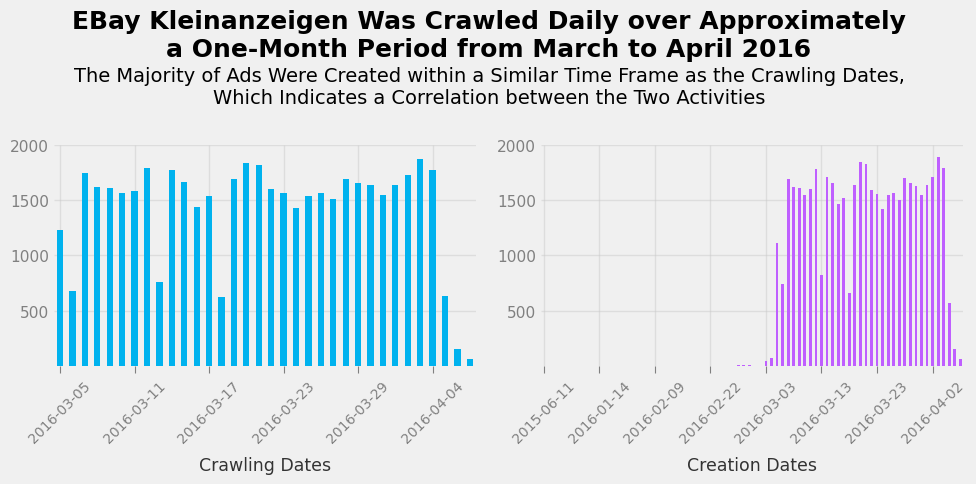

In [16]:
# Calculate the distribution of dates in the 'date_crawled' and 'date_created' columns
date_crawled_counts = autos['date_crawled'].str[:10].value_counts().sort_index()
date_created_counts = autos['date_created'].str[:10].value_counts().sort_index()

# Set the plot style to 'fivethirtyeight', and set the figure size
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 4.5))

# Add a main title and a subtitle
plt.suptitle('EBay Kleinanzeigen Was Crawled Daily over Approximately\n\
a One-Month Period from March to April 2016',
             ha="center", weight='bold', size=18, x=0.5, y=1.08)
plt.figtext(s="The Majority of Ads Were Created within a Similar Time Frame as the Crawling Dates,\n\
Which Indicates a Correlation between the Two Activities",
            ha="center", x=0.5, y=0.87, size=14)

# Plot a bar graph for the 'date_crawled' and 'date_created' data
plt.subplot(1, 2, 1)
date_crawled_counts.plot(kind='bar', color='#00B2EE')
plt.xlabel('Crawling Dates', c='#333333', labelpad=8, size=12.5)

plt.subplot(1, 2, 2)
date_created_counts.plot(kind='bar', color='#BF5FFF')
plt.xlabel('Creation Dates', c='#333333', labelpad=8, size=12.5)

# Customize ticks, labels, gridlines, and remove all spines
for i, n in zip(range(1, 3), (6, 8)):  
    plt.subplot(1, 2, i)
    plt.yticks(range(500, 2500, 500), size=11, c='grey')
    plt.xticks(rotation=45, size=10.5, c='grey')
    plt.grid(alpha=0.5)
    
    plt.gca().get_xaxis().set_major_locator(plt.MaxNLocator(nbins=n))
    plt.gca().tick_params(axis='x', colors='grey', labelsize=10, length=5)
    
    for loc in ['left', 'right', 'bottom', 'top']:
        plt.gca().spines[loc].set_visible(False)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

It appears that the website was crawled daily over approximately a one-month period in `2016`, from `March` to `April`. The distribution of crawling dates is roughly uniform, with some fluctuations.

We observe that the majority of ads were created within a similar time frame as the crawling dates. This indicates a correlation between the two activities, suggesting that the ads were likely created either before or during the crawling period.

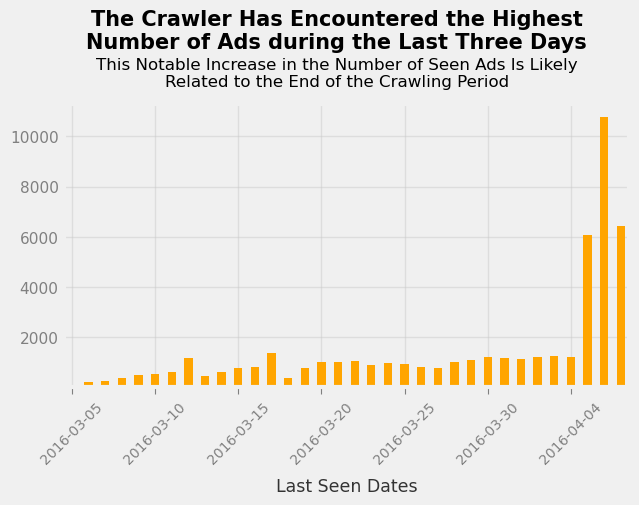

In [17]:
# Calculate the distribution of dates in the 'last_seen' column
last_seen_counts = (autos['last_seen'].str[:10].value_counts().sort_index())

# Set the figure size
plt.figure(figsize=(6.5, 3.5))

# Add a main title and a subtitle
plt.suptitle('The Crawler Has Encountered the Highest\n\
Number of Ads during the Last Three Days',
             ha="center", weight='bold', size=15, x=0.5, y=1.15)
plt.figtext(s="This Notable Increase in the Number of Seen Ads Is Likely\n\
Related to the End of the Crawling Period",
            ha="center", x=0.5, y=0.93, size=12)

# Plot a bar graph for the 'last_seen' data
last_seen_counts.plot(kind='bar', color='#ffa500')
plt.xlabel("Last Seen Dates", c='#333333', labelpad=8, size=12.5)

# Customize ticks, labels, and gridlines
plt.yticks(range(2000, 12000, 2000), size=11, c='grey')
plt.xticks(rotation=45, size=10, c='grey')
plt.grid(alpha=0.5)

plt.gca().get_xaxis().set_major_locator(plt.MaxNLocator(nbins=7))
plt.gca().tick_params(axis='x', colors='grey', labelsize=10, length=5)

# Display the plot
plt.show()

We observe a strong spike in the number of views during the last `3` days. The `last_seen` column indicates the date when the crawler last saw an ad, which allows us to infer when an ad has been delisted from the site, presumably due to a sale.

However, this notable spike in views is unlikely to be attributed to a sudden increase in sales, as the prior days exhibited a relatively consistent distribution. Instead, this significant spike is more likely related to the end of the crawling period.

## 7. Dealing with Incorrect Registration Year Data

As we mentioned earlier, the `registration_year` column contains incorrect entries, such as the minimum value of `1000`, predating the invention of cars, and the maximum value of `9999`, representing years too far in the future.

Since a car's registration year cannot exceed the listing's `last_seen` date, any vehicle with a registration year beyond `2016` is definitely inaccurate. Determining the earliest reasonable year is more challenging. Realistically, it might fall within the first few decades of the `1900s`.

In [18]:
# Display descriptive statistics for the 'registration_year' column
autos["registration_year"].describe()

count   48565.0000
mean     2004.7554
std        88.6439
min      1000.0000
25%      1999.0000
50%      2004.0000
75%      2008.0000
max      9999.0000
Name: registration_year, dtype: float64

Let's count the number of listings with cars that fall outside the `1900–2016` range. If they account for less than `5%` of the data, we'll remove their rows entirely.

In [19]:
# Filter the registration years between 1900 and 2016
valid_registration_years = autos['registration_year'].between(1900, 2016)

# Count the number of valid registration years
valid_registration_count = valid_registration_years.sum()

# Calculate the proportion of valid registration years
proportion_valid_years = round((valid_registration_count / autos.shape[0]), 2)
proportion_valid_years

0.96

In [20]:
# Filter rows where the registration year falls within the range 1900-2016
autos = autos[(autos['registration_year'] >= 1900) & (autos['registration_year'] <= 2016)]

# Display the top 10 most common registration years after filtering
autos['registration_year'].value_counts(normalize=True).head(10)

registration_year
2000   0.0676
2005   0.0629
1999   0.0621
2004   0.0579
2003   0.0578
2006   0.0572
2001   0.0565
2002   0.0533
1998   0.0506
2007   0.0488
Name: proportion, dtype: float64

We can see that the majority of cars listed in the dataset were registered within the last `20` years.

## 8. Exploring Price by Brand

Exploring variations across different car brands is a common practice when analyzing car data. We can use aggregation to gain insights from the `brand` column.

In [21]:
# Count the frequency of each car brand and normalize the results
brands = autos['brand'].value_counts(normalize=True)
brands

brand
volkswagen       0.2113
bmw              0.1100
opel             0.1076
mercedes_benz    0.0965
audi             0.0866
ford             0.0699
renault          0.0471
peugeot          0.0298
fiat             0.0256
seat             0.0183
skoda            0.0164
nissan           0.0153
mazda            0.0152
smart            0.0142
citroen          0.0140
toyota           0.0127
hyundai          0.0100
sonstige_autos   0.0098
volvo            0.0091
mini             0.0088
mitsubishi       0.0082
honda            0.0078
kia              0.0071
alfa_romeo       0.0066
porsche          0.0061
suzuki           0.0059
chevrolet        0.0057
chrysler         0.0035
dacia            0.0026
daihatsu         0.0025
jeep             0.0023
subaru           0.0021
land_rover       0.0021
saab             0.0016
jaguar           0.0016
daewoo           0.0015
trabant          0.0014
rover            0.0013
lancia           0.0011
lada             0.0006
Name: proportion, dtype: float64

German manufacturers make up the top `5` brands in the dataset, comprising almost `60%` of the overall listings. `Volkswagen` is the most popular, with approximately double the number of cars compared to the next two manufacturers.

Since many brands don't have a significant percentage of listings, we'll focus our analysis on brands that represent more than `5%` of the total car sales data.

In [22]:
# Extract brands with more than 5% of the total listings
most_common_brands = brands[brands > 0.05].index
most_common_brands

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object', name='brand')

In [23]:
# Store the mean prices of brands
brand_mean_prices = {}

# Iterate over the most common brands
for brand in most_common_brands:
    
    # Select data for the current brand, calculate its mean price, and store it to the dictionary
    current_brand = autos[autos['brand'] == brand]
    mean_price = current_brand['price'].mean()
    brand_mean_prices[brand] = round(mean_price)

# Display the mean prices of brands
brand_mean_prices

{'volkswagen': 5402,
 'bmw': 8333,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9337,
 'ford': 3749}

The analysis highlights a price disparity among the top `6` brands in the car sales data:

- `Audi`, `BMW`, and `Mercedes Benz` vehicles are typically priced higher compared to their counterparts. 
- `Ford` and `Opel` emerge as the most budget-friendly, while `Volkswagen` falls somewhere in between.

This pricing pattern may have contributed to the popularity of `Volkswagen` cars.

## 9. Storing Aggregate Data in a DataFrame

For the top `6` brands, we can use a similar method to obtain the average mileage for those cars, and then see if there's any link with the mean price.

In [24]:
# Store the mean mileages of brands
brand_mean_mileages = {}

# Iterate over the most common brands
for brand in most_common_brands:
    
    # Select data for the current brand, calculate its mean mileage, and store it to the dictionary
    current_brand = autos[autos['brand'] == brand]
    mean_mileage = current_brand['odometer_km'].mean()
    brand_mean_mileages[brand] = round(mean_mileage)
    
# Display the mean mileages of brands
brand_mean_mileages

{'volkswagen': 128707,
 'bmw': 132573,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

Next, we'll combine the following Series objects into a single DataFrame with a shared index, so we can easily compare them:

In [25]:
# Create Series objects for mean mileages and mean prices sorted in descending order
mean_mileage = pd.Series(brand_mean_mileages).sort_values(ascending=False)
mean_price = pd.Series(brand_mean_prices).sort_values(ascending=False)

# Create a DataFrame to combine mean prices and mean mileages for top brands
top_brand_info = pd.DataFrame(mean_price, columns=['mean_price'])
top_brand_info['mean_mileage'] = mean_mileage
top_brand_info

,mean_price,mean_mileage
audi,9337,129157
mercedes_benz,8628,130788
bmw,8333,132573
volkswagen,5402,128707
ford,3749,124266
opel,2975,129310


We can see that car mileages don't vary as much as prices. Moreover, we can see that the more expensive brands generally tend to have a relatively higher mileage with the only exception being `Opel`.

## 10. Additional Data Cleaning Steps

Let's further clean up the data! To do this, we'll first identify the categorical data that uses `German` words, then we'll translate and map all the values to their `English` counterparts.

In [26]:
# Print value counts for the 'gearbox', 'unrepaired_damage', 'fuel_type', and 'vehicle_type' columns
print(autos['gearbox'].value_counts())
print()
print(autos['unrepaired_damage'].value_counts())
print()
print(autos['fuel_type'].value_counts())
print()
print(autos['vehicle_type'].value_counts())

gearbox
manuell      34715
automatik     9856
Name: count, dtype: int64

unrepaired_damage
nein    33834
ja       4540
Name: count, dtype: int64

fuel_type
benzin     28540
diesel     14032
lpg          649
cng           71
hybrid        37
elektro       19
andere        15
Name: count, dtype: int64

vehicle_type
limousine     12598
kleinwagen    10585
kombi          8930
bus            4031
cabrio         3016
coupe          2462
suv            1965
andere          390
Name: count, dtype: int64


In [27]:
# Define mappings for translating German words to English
gearbox = {'manuell': 'manual', 'automatik': 'automatic'}
unrepaired_damage = {'nein': 'no', 'ja': 'yes'}

# Map the German words to English in the 'gearbox' and 'unrepaired_damage' columns
autos['gearbox'] = autos['gearbox'].map(gearbox)
autos['unrepaired_damage'] = autos['unrepaired_damage'].map(unrepaired_damage)

# Replace German fuel types with English equivalents
autos['fuel_type'] = autos['fuel_type'].replace(['benzin', 'elektro', 'andere'],
                                                ['gasoline', 'electric', 'other'])

# Replace German vehicle types with English equivalents
autos['vehicle_type'] = autos['vehicle_type'].replace(['limousine', 'kleinwagen', 'kombi', 'cabrio', 'andere'],
                                                      ['sedan', 'small car', 'station wagon', 'convertible', 'other'])

# Replace 'andere' (German for 'other') in the 'model' column with 'other'
autos['model'] = autos['model'].str.replace('andere', 'other')

# Display the first few rows of the modified DataFrame
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,date_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,5000,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,8500,control,sedan,1997,automatic,286,7er,150000,6,gasoline,bmw,no,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,8990,test,sedan,2009,manual,102,golf,70000,7,gasoline,volkswagen,no,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,4350,control,small car,2007,automatic,71,fortwo,70000,6,gasoline,smart,no,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,1350,test,station wagon,2003,manual,0,focus,150000,7,gasoline,ford,no,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


Now, let's investigate whether there is a price difference between previously damaged cars and non-damaged ones.

In [28]:
# Define a list of values for 'unrepaired_damage'
damage_status = ['no', 'yes']

# Store the mean prices for damaged and non-damaged cars
mean_price_by_status = {}

# Calculate the mean price for cars with and without unrepaired damage
for i in damage_status:
    current_status = autos[autos['unrepaired_damage'] == i]
    mean_price = current_status['price'].mean()
    mean_price_by_status[i] = round(mean_price)

# Display the mean prices for damaged and non-damaged cars
mean_price_by_status

{'no': 7164, 'yes': 2241}

Expectedly, we can see that cars that have been previously damaged are considerably cheaper than those with no damage.

## 11. Conclusion

To recap, we worked with a modified dataset of used car listings from **eBay Kleinanzeigen**. Our primary modifications involved converting and rewording column names, cleaning and converting columns storing numeric values as text, removing columns with highly similar values or irrelevant information, and removing outliers with unrealistically high or low values.

To understand the date range of our data, we extracted date values and visualized their distribution using a grid chart. Our analysis reveals that most car listings were created around the same period as the crawling dates, indicating that ads were likely posted either before or during the crawling process.

The dataset primarily consists of cars registered within the last `2` decades, with German manufacturers making up the top `5` brands, and representing nearly `60%` of the total car listings. Moreover, analyzing the top `6` brands reveals a significant price variation, with some brands typically priced higher, lower, or somewhere in the middle compared to their counterparts. Despite the price differences, the top brands share higher odometer readings, and mileage remains relatively consistent across them.

Additionally, we identified categorical data using `German` words, then translated and mapped all values to their `English` equivalents. The data highlights a notable price difference between cars with and without prior damage, with damaged vehicles being significantly cheaper, underscoring the impact of vehicle condition on pricing.